# Librerías:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import holidays
import calendar

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
bike_sharing_df = pd.read_csv('../data/processed/bike_sharing_transformed.csv')

# Modelo (Regresión):

Random Forest Regressor
R²: 0.1859
RMSE: 379.18
MAE: 31.51


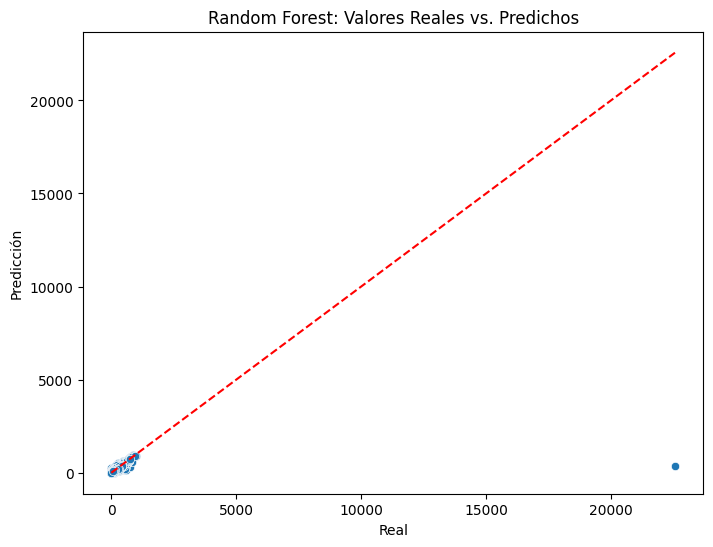

In [3]:
X = bike_sharing_df.drop(columns=['cnt', 'casual', 'registered', 'cnt_log', 'casual_log', 'registered_log', 'dteday'])
y = bike_sharing_df['cnt_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

cyclic_cols_to_scale = [col for col in X_train.columns if ('sin' in col) or ('cos' in col)]

X_train[cyclic_cols_to_scale] = scaler.fit_transform(X_train[cyclic_cols_to_scale])
X_test[cyclic_cols_to_scale] = scaler.transform(X_test[cyclic_cols_to_scale])

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_log_rf = rf_model.predict(X_test)

y_pred_original_rf = np.expm1(y_pred_log_rf)
y_test_original = np.expm1(y_test)

y_pred_original_rf[y_pred_original_rf < 0] = 0 

r2 = r2_score(y_test_original, y_pred_original_rf)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original_rf))
mae = mean_absolute_error(y_test_original, y_pred_original_rf)

print(f'Random Forest Regressor')
print(f'R²: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original_rf)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
plt.title('Random Forest: Valores Reales vs. Predichos')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.show()